# **Regression, Observations, and Interventions**

In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

COLORS = [
    '#00B0F0',
    '#FF0000'
]

## Associations in observational data versus linear regression

In [Chapter 02](\Chapter_02_Ladder_of_Causation.ipynb), we discussed the concept of association using Pearson/Spearman's correlation, now we will use a regression model to quantify it:

$\hat{Y}_{X = x} = E[Y|X=x]$

- $E[.]$ is the **expected value**;
- $X$ can be multidimentional, and in that case we call this **multiple regression**;
- LR allows us to quantify the strength of the relationship between predictors and target, it's **coefficients**;
- LR can be used to model non-linear relationship, because it has to be linear in paramenter, not in the data;
- We can also consider the **interaction** by adding the multiplicative term of predictors to the equation (for eg, $X_1 * X_2$).

In [2]:
# Set the seed for reproducibility
np.random.seed(45)

# No. of samples
N_SAMPLES = 5000

# Define true model parameters
# Arbitrarily choosing coef, this is our data generating process
alpha = 1.12
beta = 0.93
epsilon = np.random.randn(N_SAMPLES)

# Generate X
X = np.random.randn(N_SAMPLES)

# Compute Y
y = alpha + beta * X + 0.5 * epsilon

# Statsmodel models require us to add constant
X = sm.add_constant(X)

print(X[:5, :])

[[ 1.          0.11530002]
 [ 1.         -0.43617719]
 [ 1.         -0.54138887]
 [ 1.         -1.64773122]
 [ 1.         -0.32616934]]


Fit the regression model using `statsmodels` and print the summary

In [3]:
# Instantiate the model and fit it
model = sm.OLS(y, X)
fitted_model = model.fit()

# Print results summary
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                 1.681e+04
Date:                Tue, 14 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:04:12   Log-Likelihood:                -3615.0
No. Observations:                5000   AIC:                             7234.
Df Residuals:                    4998   BIC:                             7247.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1243      0.007    159.391      0.0

And generate predictions. We can see both constant and `X1`'s coeficients are associated with p-value below 0.001, indicate that they are **statistically significant** at p < 0.5 level.

In [4]:
y_pred = fitted_model.predict(X)

#### p-values and statistical significane

- p-values help to distinguish between the **signal** and the **noise**;
- the **null hypothesis** usually states that there is **no effect/difference** between 2 objects that we compare. In LR:
  - there are null hypothesis for coefficients: `coef` not significantly <> `0`;
  - and null hypothesis for the whole modell: model is not significantly <> **null model** (intercept-only);

> In statistics, the p-value is the probability that, using a given statistical model,
> the statistical summary (such as the sample mean difference between two compared groups) 
> would be the same as or more extreme than the actual observed results.
[[Source](https://math.stackexchange.com/questions/2064035/understanding-the-p-value#:~:text=In%20statistics%2C%20the%20p%2Dvalue,than%20the%20actual%20observed%20results.)]

- [[More on StatsExchange](https://stats.stackexchange.com/questions/608846/how-can-i-understand-p-value)]
- Critical review: <https://www.tandfonline.com/doi/full/10.1080/00031305.2016.1154108>

#### geometric interpretation of linear regression

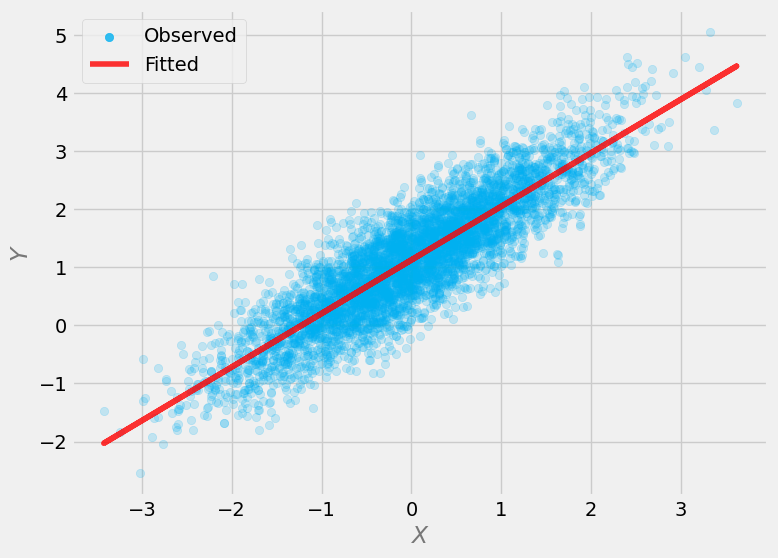

In [5]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, color=COLORS[0], label='Observed', alpha=.2)
plt.plot(X[:, 1], y_pred, color=COLORS[1], label='Fitted', alpha=.8)
plt.xlabel('$X$', alpha=.5) # support Latex!
plt.ylabel('$Y$', alpha=.5)
legend = plt.legend()

# Set opacity for the legend
[_.set_alpha(.8) for _ in legend.legend_handles] # not legendHandles

plt.show()

In the case of multiple regression, the line becomes a hyperplane!

#### reversing the order

- LR is *rung 1*, we might find statistical significane while there is truely no relationship;

In [6]:
# Let's remove the constant (now X becomes our target variable)
x_rev = X[:, 1]

# Let's add constant (now Y becomes our predictor)
Y_rev = sm.add_constant(y)

# Instantiate the model and fit it
model_rev = sm.OLS(x_rev, Y_rev)
fitted_model_rev = model_rev.fit()

# Print results summary
print(fitted_model_rev.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                 1.681e+04
Date:                Tue, 14 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:04:14   Log-Likelihood:                -3375.0
No. Observations:                5000   AIC:                             6754.
Df Residuals:                    4998   BIC:                             6767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9441      0.010    -96.048      0.0

Predict

In [7]:
x_pred_rev = fitted_model_rev.predict(Y_rev)

And plot

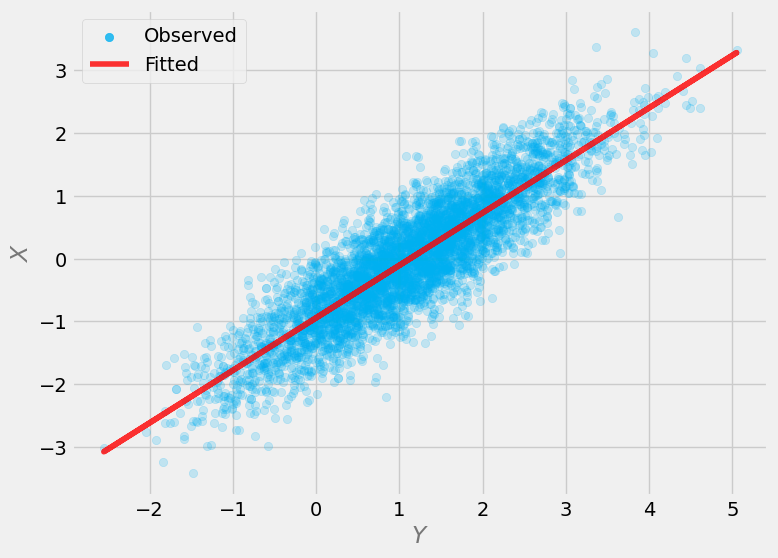

In [8]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_rev[:, 1], x_rev, color=COLORS[0], label='Observed', alpha=.2)
plt.plot(Y_rev[:, 1], x_pred_rev, color=COLORS[1], label='Fitted', alpha=.8)
plt.xlabel('$Y$', alpha=.5)
plt.ylabel('$X$', alpha=.5)
legend = plt.legend()

# Set opacity for the legend
[_.set_alpha(.8) for _ in legend.legend_handles]

plt.show()

The regression itself can not help us determine which is cause which is effect, we need some sort of external knowledge.

### Should we always control for all available covariates?

Let's examine if the parents smoking influences the risk of dyslexia in their children.
In this case, we want to control for parents education, because it (commonly known) effect how parents take care of children writing and reading.

Recommendations for selecting CVs:
- if you dont sure about it, dont use it;
- CV must be conceptually meaningful;
- conduct comparative test of relationships between IV and CV;
- run the result with and without CV and contrast findings.


In [9]:
import graphviz

#### Now consider this model, where X and Y are causally independent

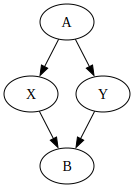

In [13]:
# Create a directed graph
g_1 = graphviz.Digraph(format='png')

# Add nodes
nodes_1 = ['A', 'X', 'B', 'Y']
[g_1.node(n) for n in nodes_1]

g_1.edges(['AX', 'XB', 'AY', 'YB'])
g_1.render('img/ch_03_graph_01') # render for print
g_1

In [ ]:
# Set random seed for reproducibility
np.random.seed(45)

# Define the sample size
N_SAMPLES = 1000

# Build the graph (note that the coefficients are arbitrarily chosen)
a = np.random.randn(N_SAMPLES)
x = 2 * a + 0.5 * np.random.randn(N_SAMPLES)
y = 2 * a + 0.5 * np.random.randn(N_SAMPLES)
b = 1.5 * x + 0.75 * y

# Define four model variants
variants = [
    [x],
    [x, a],
    [x, b],
    [x, a, b]
]

# Fit models iteratively and store the results
results = []
for variant in variants:
    X = sm.add_constant(np.stack(variant).T)

    # Instantiate the model and fit it
    model = sm.OLS(y, X)
    fitted_model = model.fit()

    results.append((fitted_model.params, fitted_model.pvalues))

    print(f'Params: {fitted_model.params.round(3)}')
    print(f'p-vals: {fitted_model.pvalues.round(3)}')
    print(f'Signif: {fitted_model.pvalues <= .05}\n')

Params: [-0.02   0.947]
p-vals: [0.359 0.   ]
Signif: [False  True]

Params: [-0.011  0.014  1.967]
p-vals: [0.488 0.657 0.   ]
Signif: [False False  True]

Params: [-0.    -2.     1.333]
p-vals: [0.019 0.    0.   ]
Signif: [ True  True  True]

Params: [ 0.    -2.     0.     1.333]
p-vals: [0.138 0.    0.002 0.   ]
Signif: [False  True  True  True]



The only model that recoginize the *causal independence* of X and Y is the second one (Y ~ X + A). This shows that other control schemes leads to invalid results, including the model that did not control additional variable (model 1). Remember that:

- A is the **confounder** bw X and Y and we need to control it to remove the confounding;
- X, Y, and B perform a pattern called **collider** or **immorality**;
- 


In [15]:
# Instantiate the model and fit it
model = sm.OLS(y, X)
fitted_model = model.fit()

# Print results summary
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.441e+32
Date:                Tue, 14 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:49:18   Log-Likelihood:                 31990.
No. Observations:                1000   AIC:                        -6.397e+04
Df Residuals:                     996   BIC:                        -6.395e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.457e-16   9.82e-17      1.484      0.1

## Causal perspective of statistical control

## Regression and structural models